### Table of Contents
1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
3. [Exploratory Data Analysis](#eda)
4. [Model Building](#model-building)
5. [Model Evaluation](#model-evaluation)


## Problem Definition
> Given clinical parameters about a patient, is it possible to predict wheter a they have heart disease or not

#### Features of the dataset


* age (Age of the patient in years)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg resting electrocardiographic results ([normal, stt abnormality, lv hypertrophy])
* thalach maximum heart rate achieved
* exang exercise-induced angina (True/ False)
* oldpeak ST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by fluoroscopy
* thal [normal; fixed defect; reversible defect]
* target the predicted attribute

In [294]:
# Importing the modules for the project

# Data Analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Modelling and training
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from joblib import dump

In [247]:
heart_disease = pd.read_csv('heart-disease.csv')
len(heart_disease)

303

In [248]:
heart_disease.drop_duplicates(inplace=True)
len(heart_disease)

302

In [249]:
import warnings

# Filter out specific warnings by category
warnings.filterwarnings("ignore", category=DeprecationWarning)  
warnings.filterwarnings("ignore", category=UserWarning)       



# Exploratory Data Analysis (EDA)

1. Treating diffrent datatypes if there is any
2. Checking for missing data and dealing with them
3. Checking for outliers and handling them
4. Adding, Changing and removing features to get more out of the data

In [250]:
 heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [251]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [252]:
# How many of Each class there are
heart_disease['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

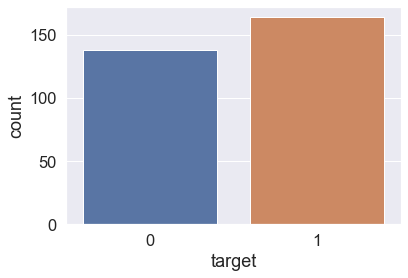

In [253]:
sns.countplot(x='target', data=heart_disease)

In [254]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [255]:
# Checking for missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**From the dataset it was depicted that there were no missing values in the data**

In [256]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [257]:
# Comapring the target column with sex column
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,92


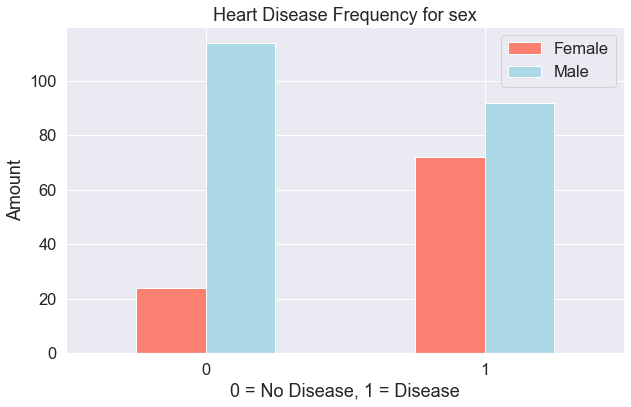

In [258]:
# Creating a plot of crosstab
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for sex')
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [259]:
heart_disease['thalach'].value_counts()

162    11
160     9
163     9
152     8
125     7
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

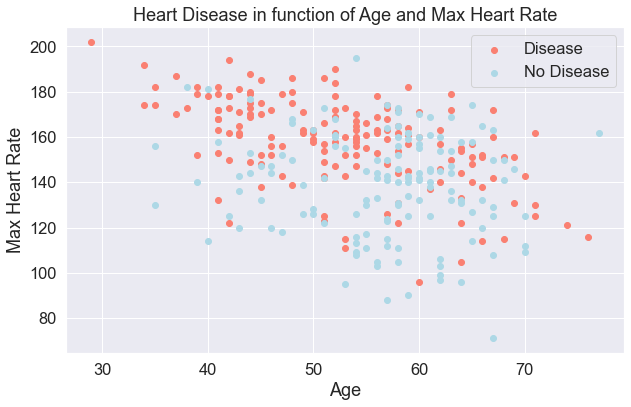

In [260]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],
            c='salmon'
           )
# Scatter plot with negative examples
plt.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.thalach[heart_disease.target==0],
           c='lightblue');

plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

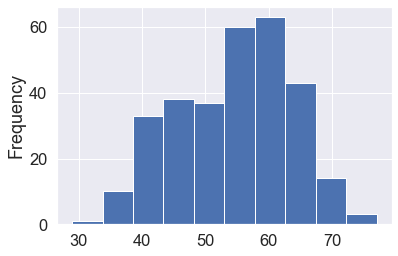

In [261]:
# Checking the distribution of the age column
heart_disease.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

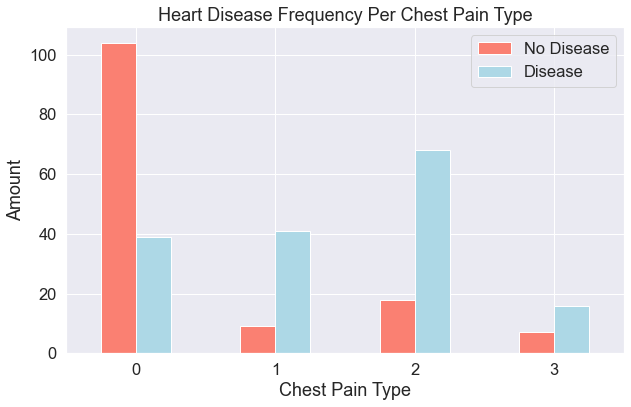

In [262]:
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind='bar',figsize=(10,6), color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

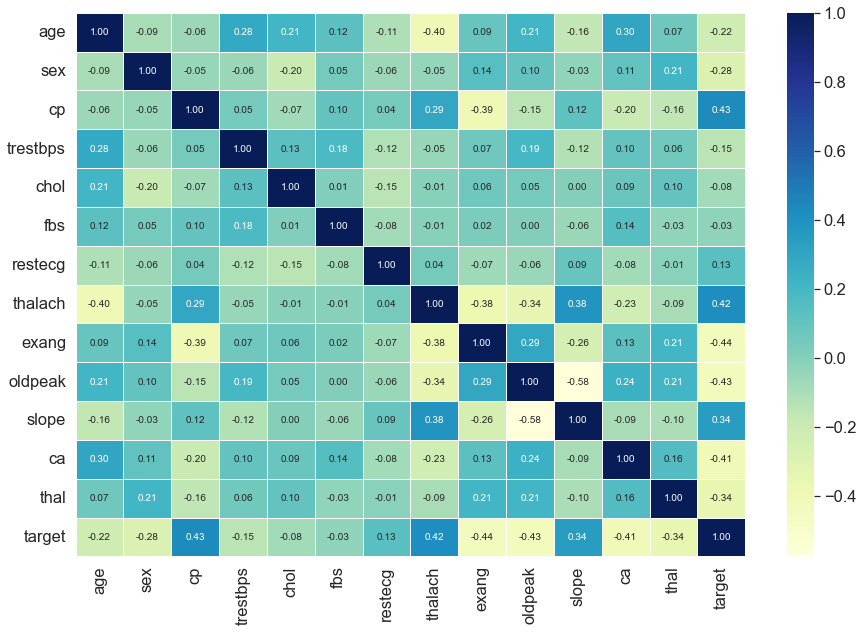

In [263]:
# Correlation matrix plo 
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

### Modelling

In [264]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [265]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [266]:
np.random.seed(42)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

### Trying three diffrent machine learning models for the classification model
1. LogisticRegressor
2. RandomForestlassifier
3. KNeigborsClassifier

In [267]:
models = {"Logistic Regression":  LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models,X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of diffrent Sckit-Learn Machine Classifier models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]  = model.score(X_test, y_test)
    return model_scores
        

In [268]:
models_scores = fit_and_score(models=models,
                       X_train=X_train,
                       X_test=X_test,
                       y_train=y_train,
                       y_test=y_test)

models_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8688524590163934}

<AxesSubplot:>

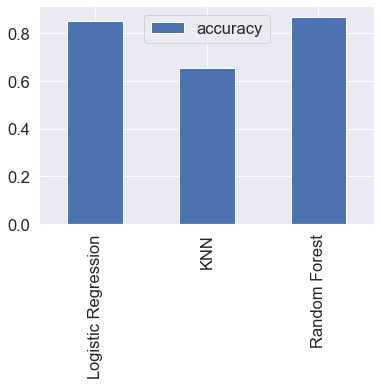

In [269]:
model_compare = pd.DataFrame(models_scores, index=['accuracy'])

model_compare.T.plot.bar()

**From the figure above we can infere that the LogisticRegression and RandomForestClassifier models are the best performers without hyperparameter tuning**

### Hyperparameter Tuning

In [270]:
# Tunning the KNN
    
train_scores = []
test_scores = []
 
#List for diffrent values of n_neigbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fitting the algorithm
    knn.fit(X_train, y_train)
    
    #Updating the traning scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Updating the test scores
    test_scores.append(knn.score(X_test, y_test))
    

    



In [271]:
train_scores

[1.0,
 0.8174273858921162,
 0.7634854771784232,
 0.7385892116182573,
 0.7593360995850622,
 0.7385892116182573,
 0.7261410788381742,
 0.7178423236514523,
 0.7385892116182573,
 0.7178423236514523,
 0.7178423236514523,
 0.7095435684647303,
 0.7012448132780082,
 0.7012448132780082,
 0.7012448132780082,
 0.6929460580912863,
 0.7136929460580913,
 0.6970954356846473,
 0.7095435684647303,
 0.7178423236514523]

In [272]:
test_scores

[0.5409836065573771,
 0.6065573770491803,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.6885245901639344,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327]

Maximum KNN score on the test data: 70.49%


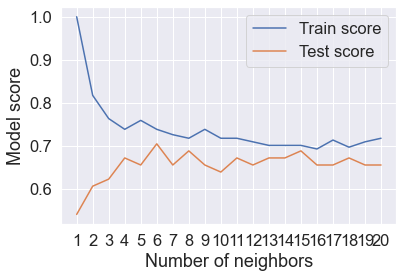

In [273]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**After Hyperparameter tuning the KNN model now has an accuracy of 70.49% higher than the previous 65.57%**

In [274]:
# Logistic Regression Hyperparameter grid 
log_reg_grid  = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

# Random Forest Hyperparameter grid
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [275]:
### Tunning the Logistic Regression model

np.random.seed(42)

rs_log_reg =  RandomizedSearchCV(LogisticRegression(), 
                                 param_distributions=log_reg_grid,
                                 cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [276]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [277]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

**After Tuning the hyperparameters for the LogisticRegression model it came out with a lower accuracy of 83.60% which is lower than the initial 85.24%**

In [278]:
np.random.seed(42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rs_rf  = RandomizedSearchCV(RandomForestClassifier(), 
                            param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [279]:
 rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [280]:
rs_rf.score(X_test, y_test)

0.9016393442622951

**After Tuning the hyperparameters for the  RandomForestClassification model it came out with the same accuracy wich is 86.88%**

### Evaluating the model

In [281]:
# Making predictions with the tuned model 
y_preds = rs_rf.predict(X_test)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


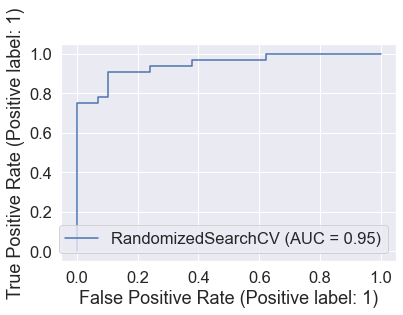

In [282]:
# Plotting the ROC curve and calculating the AUC metric
from sklearn.metrics import RocCurveDisplay
plot_roc_curve(rs_rf, X_test, y_test)

In [283]:
# Confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots Confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds ),
                    annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

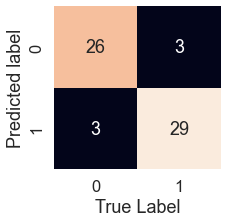

In [284]:
plot_conf_mat(y_test, y_preds)

### The confusion matrix for the Random Forest model showed:
- True Positives: 28
- False Positives: 4
- True Negatives: 4
- False Negatives: 25


In [285]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Evaluation metrics using Cross validation

In [286]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [287]:
clf = RandomForestClassifier(n_estimators=1200, min_samples_leaf=2, min_samples_split=5,
                            max_features='sqrt', max_depth=20, bootstrap=True)

In [288]:
# Cross Validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.8308743169398907

In [289]:
cv_precison = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precison = cv_precison.mean()
cv_precison

0.835112716403039

In [290]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = cv_recall.mean()
cv_recall

0.8598484848484848

In [291]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = cv_f1.mean()
cv_f1

0.8452941176470589

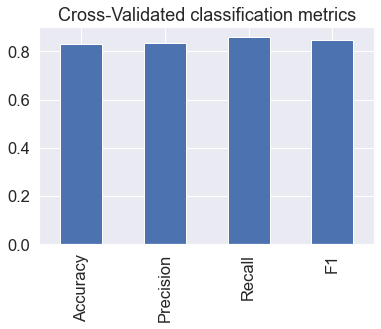

In [292]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precison,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated classification metrics", legend=False);

In [293]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier# Replace with your actual model

model = clf

X_train = X_train

# Create a dictionary to store the input widgets
input_widgets = {}

# Create text input widgets for each feature in X_train
for feature in X_train.columns:
    input_widgets[feature] = widgets.Text(description=feature + ':')
prediction = 0
# Create a prediction function
def make_prediction(b):
    input_features = {}
    
    # Retrieve the input values from the widgets
    for feature, widget in input_widgets.items():
        input_features[feature] = widget.value

    # Prepare the input data as a dictionary
    input_data = {feature: [value] for feature, value in input_features.items()}

    # Create a DataFrame from the input data
    input_df = pd.DataFrame(input_data)

    # Make a prediction
    prediction = model.predict(input_df)

    # Display the prediction
    with output:
        print(f'Predicted Result: {prediction[0]}')

# Create a button for prediction
predict_button = widgets.Button(description='Predict', button_style= "danger")
predict_button.on_click(make_prediction)
output = widgets.Output()

# Display the input widgets and prediction button
input_widgets_list = list(input_widgets.values())
input_widgets_list.append(predict_button)
input_widgets_list.append(output)
display(*input_widgets_list)

Text(value='', description='age:')

Text(value='', description='sex:')

Text(value='', description='cp:')

Text(value='', description='trestbps:')

Text(value='', description='chol:')

Text(value='', description='fbs:')

Text(value='', description='restecg:')

Text(value='', description='thalach:')

Text(value='', description='exang:')

Text(value='', description='oldpeak:')

Text(value='', description='slope:')

Text(value='', description='ca:')

Text(value='', description='thal:')

Button(button_style='danger', description='Predict', style=ButtonStyle())

Output()

In [295]:
#Saving the model
dump(clf, 'heart_disease.joblib')

['heart_disease.joblib']